In [1]:
%matplotlib inline


# Partial Wasserstein and Gromov-Wasserstein example


This example is designed to show how to use the Partial (Gromov-)Wassertsein
distance computation in POT.



In [2]:
# Author: Laetitia Chapel <laetitia.chapel@irisa.fr>
# License: MIT License

# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
import scipy as sp
import numpy as np
import matplotlib.pylab as pl
import ot

Sample two 2D Gaussian distributions and plot them
--------------------------------------------------

For demonstration purpose, we sample two Gaussian distributions in 2-d
spaces and add some random noise.



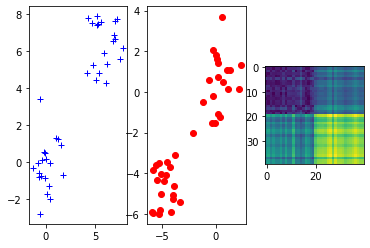

In [3]:
n_samples = 20  # nb samples (gaussian)
n_noise = 20  # nb of samples (noise)

mu = np.array([0, 0])
cov = np.array([[1, 0], [0, 2]])

xs = ot.datasets.make_2D_samples_gauss(n_samples, mu, cov)
xs = np.append(xs, (np.random.rand(n_noise, 2) + 1) * 4).reshape((-1, 2))
xt = ot.datasets.make_2D_samples_gauss(n_samples, mu, cov)
xt = np.append(xt, (np.random.rand(n_noise, 2) + 1) * -3).reshape((-1, 2))

M = sp.spatial.distance.cdist(xs, xt)

fig = pl.figure()
ax1 = fig.add_subplot(131)
ax1.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
ax2 = fig.add_subplot(132)
ax2.scatter(xt[:, 0], xt[:, 1], color='r')
ax3 = fig.add_subplot(133)
ax3.imshow(M)
pl.show()

Compute partial Wasserstein plans and distance
----------------------------------------------



Partial Wasserstein distance (m = 0.5): 0.45151590745848863
Entropic partial Wasserstein distance (m = 0.5): 0.46654948274375097


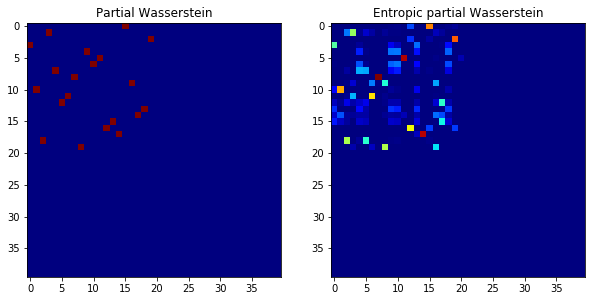

In [4]:
p = ot.unif(n_samples + n_noise)
q = ot.unif(n_samples + n_noise)

w0, log0 = ot.partial.partial_wasserstein(p, q, M, m=0.5, log=True)
w, log = ot.partial.entropic_partial_wasserstein(p, q, M, reg=0.1, m=0.5,
                                                 log=True)

print('Partial Wasserstein distance (m = 0.5): ' + str(log0['partial_w_dist']))
print('Entropic partial Wasserstein distance (m = 0.5): ' +
      str(log['partial_w_dist']))

pl.figure(1, (10, 5))
pl.subplot(1, 2, 1)
pl.imshow(w0, cmap='jet')
pl.title('Partial Wasserstein')
pl.subplot(1, 2, 2)
pl.imshow(w, cmap='jet')
pl.title('Entropic partial Wasserstein')
pl.show()

Sample one 2D and 3D Gaussian distributions and plot them
---------------------------------------------------------

The Gromov-Wasserstein distance allows to compute distances with samples that
do not belong to the same metric space. For demonstration purpose, we sample
two Gaussian distributions in 2- and 3-dimensional spaces.



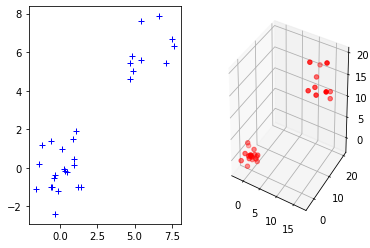

In [5]:
n_samples = 20  # nb samples
n_noise = 10  # nb of samples (noise)

p = ot.unif(n_samples + n_noise)
q = ot.unif(n_samples + n_noise)

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([0, 0, 0])
cov_t = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


xs = ot.datasets.make_2D_samples_gauss(n_samples, mu_s, cov_s)
xs = np.concatenate((xs, ((np.random.rand(n_noise, 2) + 1) * 4)), axis=0)
P = sp.linalg.sqrtm(cov_t)
xt = np.random.randn(n_samples, 3).dot(P) + mu_t
xt = np.concatenate((xt, ((np.random.rand(n_noise, 3) + 1) * 10)), axis=0)

fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(xt[:, 0], xt[:, 1], xt[:, 2], color='r')
pl.show()

Compute partial Gromov-Wasserstein plans and distance
-----------------------------------------------------



-----m = 1
Wasserstein distance (m = 1): 62.612867557378095
Entropic Wasserstein distance (m = 1): 64.09799387131392


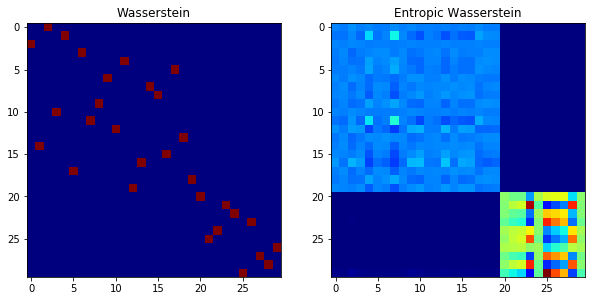

-----m = 2/3
Partial Wasserstein distance (m = 2/3): 0.252736149616858
Entropic partial Wasserstein distance (m = 2/3): 1.407282181449262


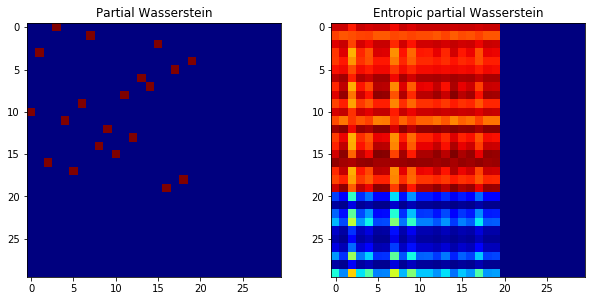

In [6]:
C1 = sp.spatial.distance.cdist(xs, xs)
C2 = sp.spatial.distance.cdist(xt, xt)

# transport 100% of the mass
print('-----m = 1')
m = 1
res0, log0 = ot.partial.partial_gromov_wasserstein(C1, C2, p, q, m=m, log=True)
res, log = ot.partial.entropic_partial_gromov_wasserstein(C1, C2, p, q, 10,
                                                          m=m, log=True)

print('Wasserstein distance (m = 1): ' + str(log0['partial_gw_dist']))
print('Entropic Wasserstein distance (m = 1): ' + str(log['partial_gw_dist']))

pl.figure(1, (10, 5))
pl.title("mass to be transported m = 1")
pl.subplot(1, 2, 1)
pl.imshow(res0, cmap='jet')
pl.title('Wasserstein')
pl.subplot(1, 2, 2)
pl.imshow(res, cmap='jet')
pl.title('Entropic Wasserstein')
pl.show()

# transport 2/3 of the mass
print('-----m = 2/3')
m = 2 / 3
res0, log0 = ot.partial.partial_gromov_wasserstein(C1, C2, p, q, m=m, log=True)
res, log = ot.partial.entropic_partial_gromov_wasserstein(C1, C2, p, q, 10,
                                                          m=m, log=True)

print('Partial Wasserstein distance (m = 2/3): ' +
      str(log0['partial_gw_dist']))
print('Entropic partial Wasserstein distance (m = 2/3): ' +
      str(log['partial_gw_dist']))

pl.figure(1, (10, 5))
pl.title("mass to be transported m = 2/3")
pl.subplot(1, 2, 1)
pl.imshow(res0, cmap='jet')
pl.title('Partial Wasserstein')
pl.subplot(1, 2, 2)
pl.imshow(res, cmap='jet')
pl.title('Entropic partial Wasserstein')
pl.show()